In [288]:
from math import pi
import matplotlib.pyplot as plt
import numpy as np
import pennylane as qml
from pennylane.optimize import AdamOptimizer
import datetime
now=datetime.datetime.now

In [289]:
num_qubits=1
dev=qml.device('default.qubit', wires=num_qubits)
seed = 40
np.random.seed(seed)

In [290]:
t=np.linspace(0, 10, 10)



In [291]:
@qml.qnode(dev, diff_method="backprop", interface="autograd")
def hepler(encoded_x,theta):
    qml.QubitStateVector(encoded_x,wires=[0])
    qml.RY(wires=0,phi=theta)
    return qml.probs(wires=[0])

In [292]:
def encoder(x):
    vector_x = [1,x]
    norm_x = np.linalg.norm(vector_x)
    return vector_x/norm_x , norm_x

In [293]:
def f(x,theta,w):
    encoded_x,norm_x = encoder(x)
    # print(qml.draw(hepler)(encoded_x))
    f_val = hepler(encoded_x,theta)
    # return f_val[1]*norm_x
    return f_val[1]*(norm_x**2)+w

In [294]:
# f(-1.7)

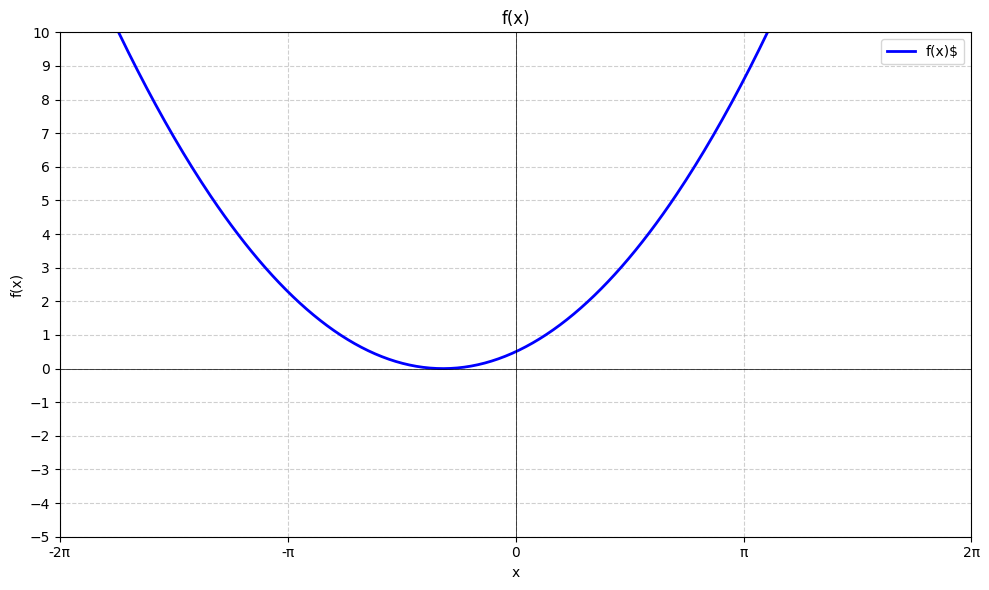

In [295]:
import numpy as np
import matplotlib.pyplot as plt



x = np.linspace(-2*np.pi, 2*np.pi, 400)


y = [f(x,np.pi/2,0) for x in x] 


plt.figure(figsize=(10, 6))  
plt.plot(x, y, label='f(x)$', linewidth=2, color='b')  
plt.xlabel('x')  # X-axis label
plt.ylabel('f(x)')  # Y-axis label
plt.title('f(x)')  # 
plt.grid(True, linestyle='--', alpha=0.6) 
plt.legend()  
plt.axhline(0, color='black',linewidth=0.5) 
plt.axvline(0, color='black',linewidth=0.5) 
plt.ylim([-5, 10])  
plt.xlim([-2*np.pi, 2*np.pi])  #
plt.xticks([-2*np.pi, -np.pi, 0, np.pi, 2*np.pi], ['-2π', '-π', '0', 'π', '2π'])  # Custom x-axis ticks
plt.yticks(np.arange(-5, 11, 1))  
plt.tight_layout()  

plt.show() 


In [296]:
def f_test(t):
    return 8-t**2

In [297]:
def callbackF(parameters):
    # global current_loss

    print("Current loss:", cost(parameters)) 


def cost(params):
    global theta
    global w
    # Reshape the flattened theta back to its original shape
    theta_shape = theta.shape
    w_shape = w.shape
    w, theta_flat = params[:1], params[1:]
    theta = theta_flat.reshape(theta_shape)
    loss = 0
    for x in t:
        loss += (f(x,theta[0],w)-f_test(x))**2/len(t)
    
    # print(w)
    # print(theta)
    # raise KeyError
    return loss

In [298]:
import numpy as np
from scipy.optimize import minimize

num_layers=4

theta = np.random.uniform(0, 2 * np.pi, size=(1))
w = np.zeros(1)

initial_params = np.concatenate([w, theta.flatten()])  # Flatten theta to a 1D array

result = minimize(cost, initial_params, callback=callbackF, method='BFGS', options={'gtol': 1E-2})
# Extract the optimized parameters
w, theta_flat = result.x[:1], result.x[1:]
theta = theta_flat.reshape(theta.shape)

Current loss: [1876.79520644]
Current loss: [1101.48918434]
Current loss: [1080.5936018]
Current loss: [1080.4283521]
Current loss: [1080.37941857]
Current loss: [1080.37921548]


[8.0, 6.765432098765432, 3.061728395061728, -3.1111111111111125, -11.753086419753089, -22.864197530864196, -36.44444444444445, -52.49382716049384, -71.01234567901236, -92.0]


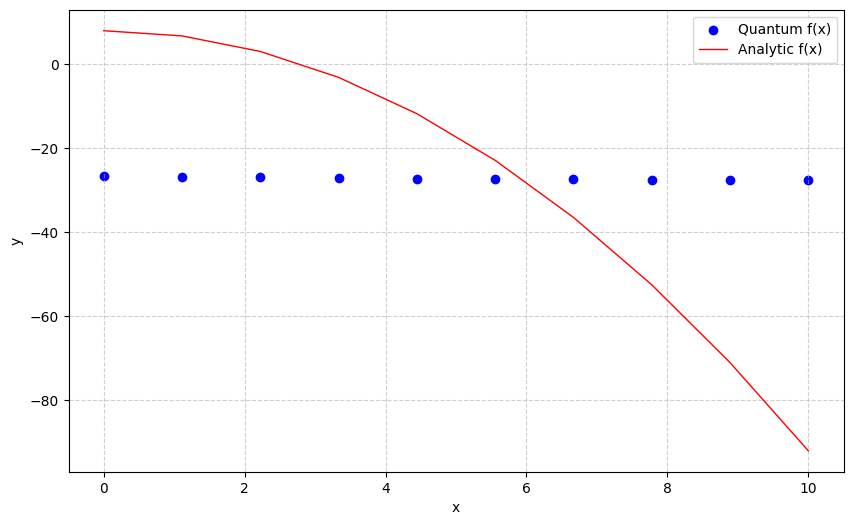

In [299]:


# Calculate corresponding y values for both functions
y1 = [f(x,theta[0],w) for x in t]
y2 = [f_test(x) for x in t]
print(y2)

# Create the plot
plt.figure(figsize=(10, 6))  # Set the figure size
plt.scatter(t, y1, label='Quantum f(x)', linewidth=1, color='b')  # Plot the first function
plt.plot(t, y2, label='Analytic f(x)', linewidth=1, color='r')  # Plot the second function
plt.xlabel('x')  
plt.ylabel('y') 
plt.title('') 
plt.grid(True, linestyle='--', alpha=0.6)  # Add a grid
plt.legend()  # Show the legend
# plt.axhline(0, color='black', linewidth=0.5) 
# plt.axvline(0, color='black', linewidth=0.5)  

